In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp

import orc
from orc.utils import visualization as vis

# Generate lorenz data

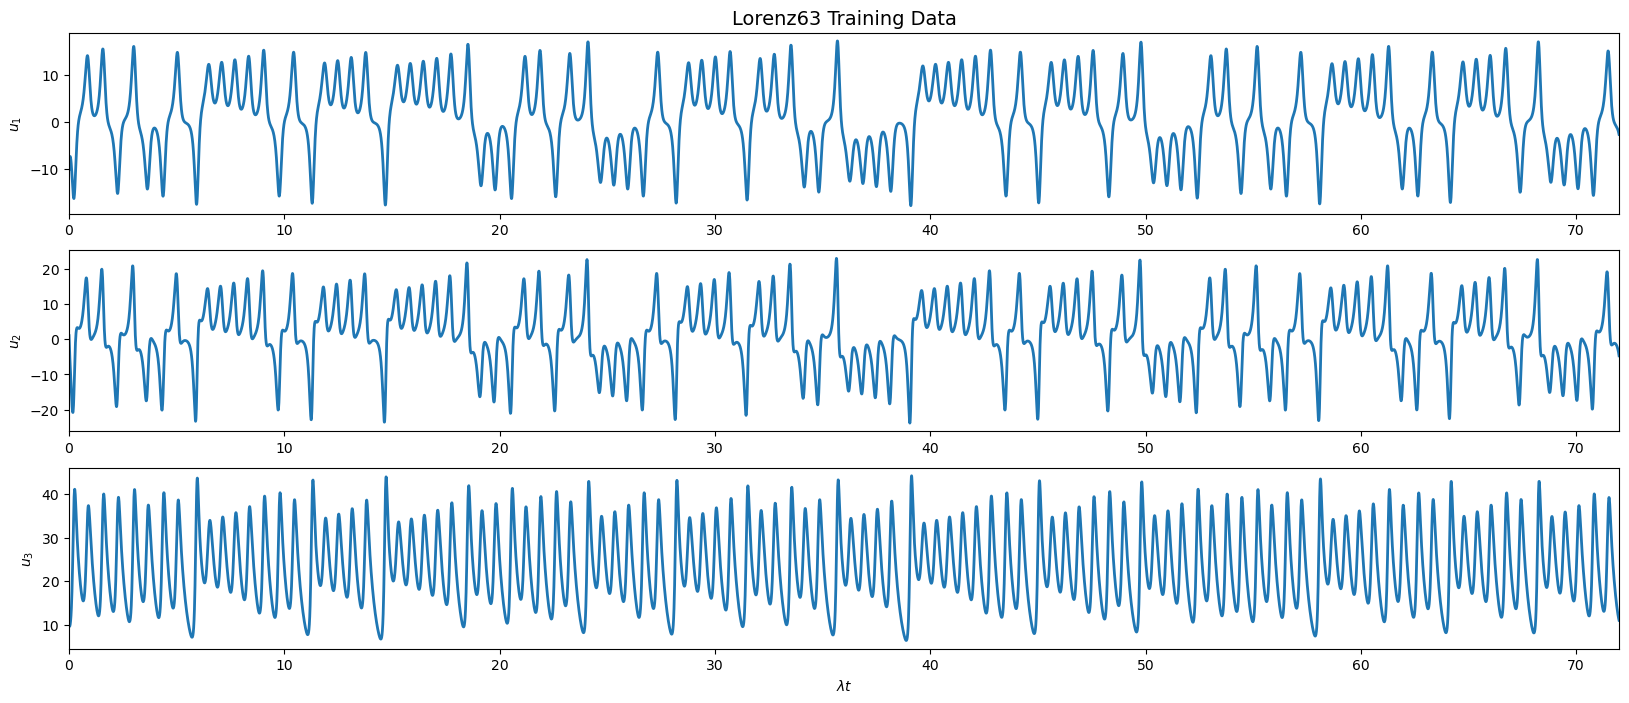

In [2]:
### Integrate + Plot Lorenz63 System

# integrate 
tN = 100
LYAP = 0.9
dt = 0.01
U,t = orc.data.lorenz63(tN=tN, dt=dt)

# train-test split
test_perc = 0.2
split_idx = int((1 - test_perc) * U.shape[0])
U_train = U[:split_idx, :]
t_train = t[:split_idx] * LYAP
U_test = U[split_idx:, :]
t_test = np.linspace(0, dt * U_test.shape[0], U_test.shape[0]) * LYAP

# plot training data
vis.plot_time_series(
    U_train,
    t_train,
    state_var_names=["$u_1$", "$u_2$", "$u_3$"],
    title="Lorenz63 Training Data",
    x_label= r"$\lambda t$",
)

In [3]:
# init + train ESN
NR = 1000
train_len = 3000
esn = orc.models.ESNForecaster(data_dim=3, res_dim=NR, seed=0)
r0 = jnp.zeros((NR,))
esn, R = orc.models.train_ESNForecaster(esn, U_train[-train_len-1:-1])

# forecast
U_pred = esn.forecast(fcast_len=U_test.shape[0], res_state=R[-1])

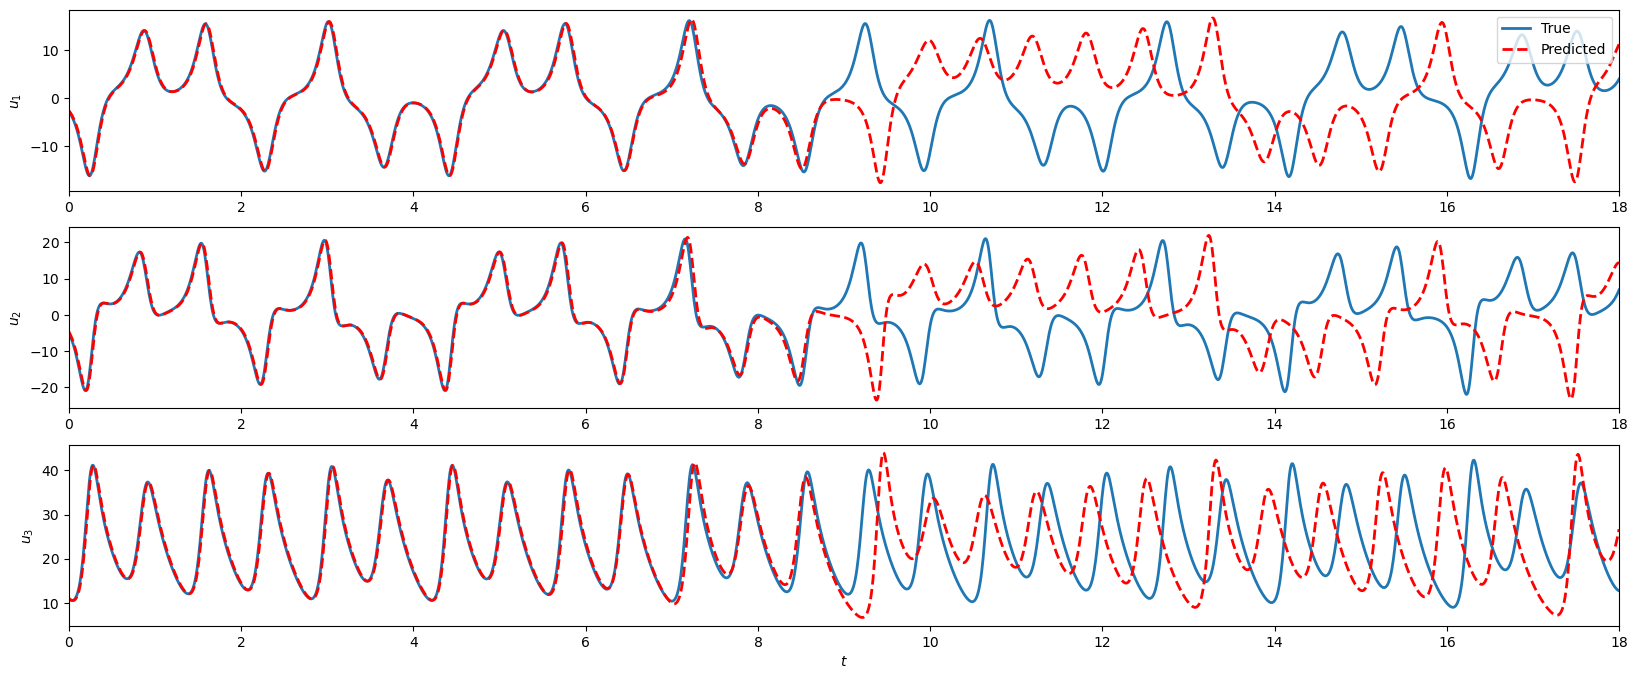

In [4]:
# plot forecast
vis.plot_time_series(
    [U_test, U_pred],
    t_test,
    state_var_names=["$u_1$", "$u_2$", "$u_3$"],
    time_series_labels=["True", "Predicted"],
    line_formats=["-", "r--"]
)